In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif_

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, plot_confusion_matrix, precision_score,roc_auc_score

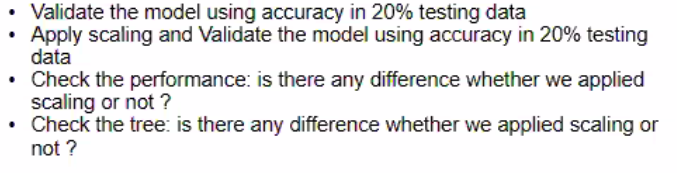

In [2]:
tree = DecisionTreeClassifier(criterion = 'gini', max_depth=2, max_features=None)
tree_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth=2, max_features=None)
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

klo none, semua feature dipake.
random state, supaya pengambilan random itu tetep sama.

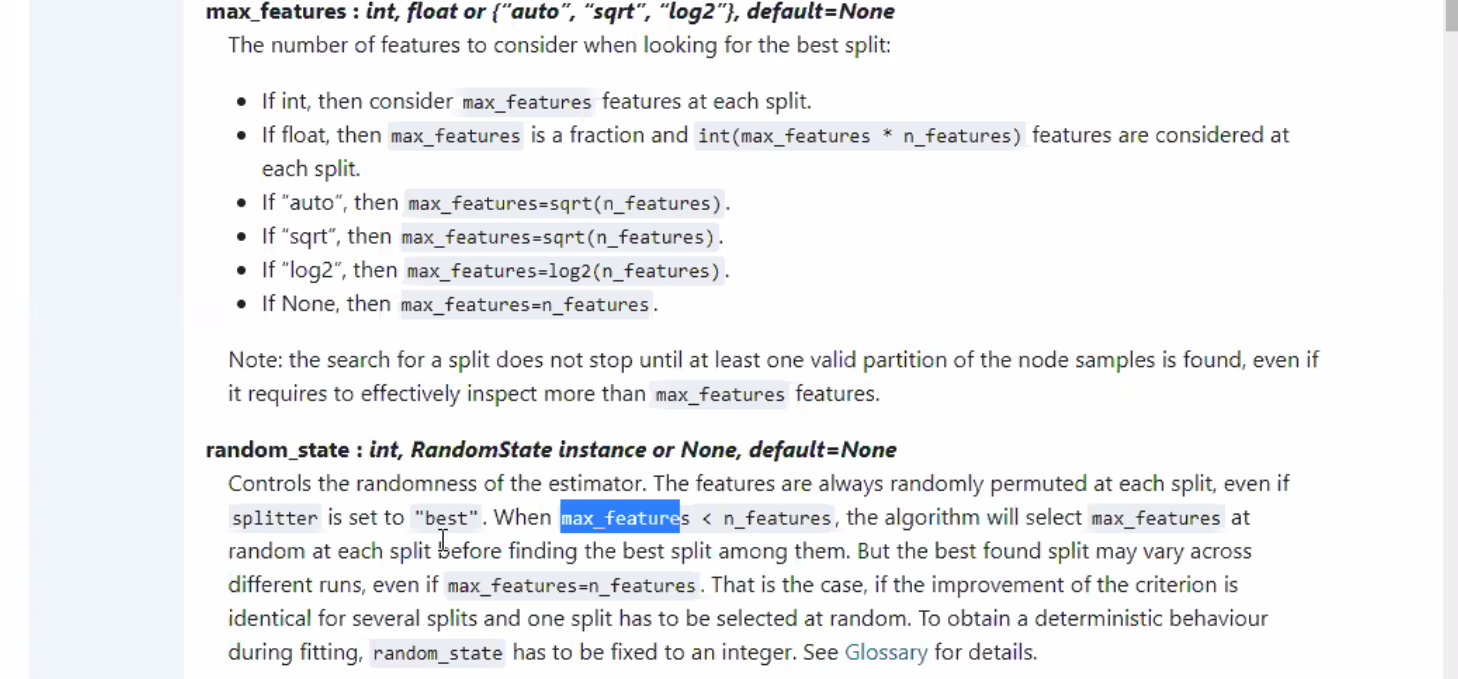

In [3]:
wine = pd.read_csv('white_wine.csv')
wine['label'] = np.where(wine['quality']>6,1,0)
wine[wine['label']==1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
13,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9962,3.54,0.52,12.4,7.0,1
15,6.6,0.17,0.38,1.5,0.032,28.0,112.0,0.9964,3.25,0.55,11.4,7.0,1
17,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9942,3.33,0.39,12.8,8.0,1
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9942,3.33,0.39,12.8,8.0,1
21,6.4,0.31,0.38,2.9,0.038,19.0,102.0,0.9962,3.17,0.35,11.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,7.4,0.28,0.36,1.1,0.028,42.0,105.0,0.9943,2.99,0.39,12.4,7.0,1
491,7.1,0.23,0.39,1.6,0.032,12.0,65.0,0.9948,3.25,0.40,12.7,7.0,1
507,6.0,0.24,0.27,1.9,0.048,40.0,170.0,0.9988,3.64,0.54,10.0,7.0,1
509,6.0,0.24,0.27,1.9,0.048,40.0,170.0,0.9988,3.64,0.54,10.0,7.0,1


In [4]:
wine['alcohol'].fillna(wine['alcohol'].mean(), inplace=True)
X = wine[['density','alcohol']]
y = wine['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

In [5]:
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [6]:
tree.feaature_importances_

array([0.63988816, 0.36011184])

KNN accuracy score 	: 0.9326923076923077
KNN AUC of ROC score 	: 0.8633923778851315

KNN Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        81
           1       0.94      0.74      0.83        23

    accuracy                           0.93       104
   macro avg       0.94      0.86      0.89       104
weighted avg       0.93      0.93      0.93       104



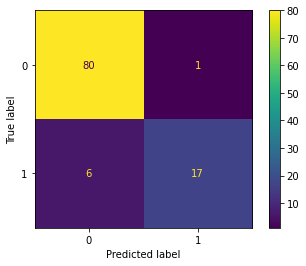

In [7]:
print('KNN accuracy score \t:',accuracy_score(y_test, y_pred))
print('KNN AUC of ROC score \t:',roc_auc_score(y_test, y_pred))
print()
print('KNN Classification report : \n',classification_report(y_test, y_pred))
plot_confusion_matrix(tree, X_test, y_test)

[Text(279.0, 317.09999999999997, 'alcohol <= 10.85\ngini = 0.296\nsamples = 416\nvalue = [341, 75]\nclass = Bad'),
 Text(139.5, 190.26, 'density <= 1.0\ngini = 0.148\nsamples = 324\nvalue = [298, 26]\nclass = Bad'),
 Text(69.75, 63.420000000000016, 'gini = 0.103\nsamples = 311\nvalue = [294, 17]\nclass = Bad'),
 Text(209.25, 63.420000000000016, 'gini = 0.426\nsamples = 13\nvalue = [4, 9]\nclass = Good'),
 Text(418.5, 190.26, 'density <= 0.994\ngini = 0.498\nsamples = 92\nvalue = [43, 49]\nclass = Good'),
 Text(348.75, 63.420000000000016, 'gini = 0.0\nsamples = 41\nvalue = [41, 0]\nclass = Bad'),
 Text(488.25, 63.420000000000016, 'gini = 0.075\nsamples = 51\nvalue = [2, 49]\nclass = Good')]

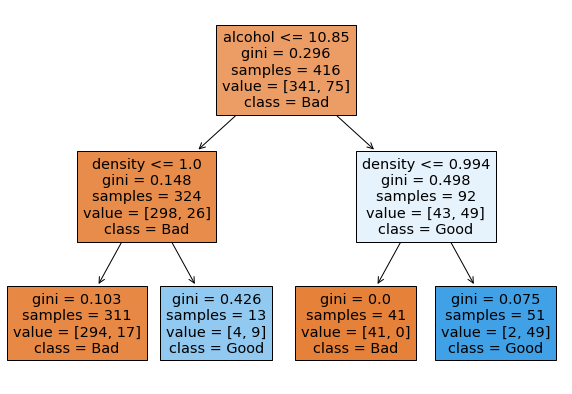

In [8]:
plt.figure(figsize=(10,7))
plot_tree(tree, feature_names = list(X.columns), class_names=['Bad','Good'], filled=True)

In [9]:
i = 4
X_test.iloc[i]

density     0.9962
alcohol    12.4000
Name: 13, dtype: float64

In [10]:
y_test.iloc[i]

1

In [11]:
tree.predict_proba([X_test.iloc[i]])

array([[0.03921569, 0.96078431]])

Pakai anu, entropy

In [13]:
tree_entropy.fit(X_train, y_train)
y_pred_ent = tree_entropy.predict(X_test)

In [15]:
tree_entropy.feature_importances_

array([0.65853478, 0.34146522])

KNN accuracy score 	: 0.9134615384615384
KNN AUC of ROC score 	: 0.8043478260869565

KNN Classification report : 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        81
           1       1.00      0.61      0.76        23

    accuracy                           0.91       104
   macro avg       0.95      0.80      0.85       104
weighted avg       0.92      0.91      0.91       104



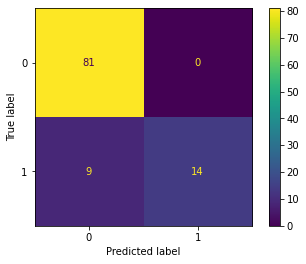

In [17]:
print('KNN accuracy score \t:',accuracy_score(y_test, y_pred_ent))
print('KNN AUC of ROC score \t:',roc_auc_score(y_test, y_pred_ent))
print()
print('KNN Classification report : \n',classification_report(y_test, y_pred_ent))
plot_confusion_matrix(tree_entropy, X_test, y_test)

In [18]:
tree_entropy.predict_proba([X_test.iloc[i]])

array([[0.03921569, 0.96078431]])